<a href="https://colab.research.google.com/github/YyammZ/Analisis-Data/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset](https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view?usp=sharing)
- **Nama:** Muh. Akram
- **Email:** muh.akramm168@gmail.com
- **ID Dicoding:** MS026D5Y0520

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah terdapat tren peningkatan atau penurunan dalam jumlah penyewaan sepeda selama periode 2011-2012?

- Pertanyaan 2: Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


## Data Wrangling

### Gathering Data

In [ ]:
url = "https://raw.githubusercontent.com/YyammZ/Analisis-Data/main/day.csv"
Day = pd.read_csv(url)
print(Day.head())
print("------------------------------------------------------------------------------------------")
url = "https://raw.githubusercontent.com/YyammZ/Analisis-Data/main/hour.csv"
Hour = pd.read_csv(url)
print(Hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
--------------------------

**Insight:**
- Dataset 'day.csv' dan 'hour.csv' berhasil dimuat dan kita bisa melihat 5 baris pertama pada file 'day.csv' dan file 'hour.csv'

### Assessing Data

In [ ]:
    # Menilai Data Day
print("\nPenilaian Data Day:")
print(" ")
Day.info()
print(Day.isna().sum())
print(Day.describe())
print("Jumlah duplikasi file Day: ", Day.duplicated().sum())
print('========================================================================================================')
    # Menilai Data Hour
print("\nPenilaian Data Hour:")
print("")
Hour.info()
print(Hour.isna().sum())
print(Hour.describe())
print("Jumlah duplikasi file Hour: ", Hour.duplicated().sum())


Penilaian Data Day:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
instant       0
dteday        0
season        0
yr            0
mnth  

**Insight:**
- Kita bisa lihat pada file 'day.csv' dan 'hour.csv', kolom dteday bertipe object (string) dan harus diubah menjadi datetime untuk kemudahan analisis waktu.
- Tidak ada missing values dikedua dataset.
- Kedua dataset tidak memiliki duplikasi data.
- Tidak ada missing values dikedua dataset.
- Nilai dikedua dataset masuk akal (kecuali kelom dteday), tidak ditemukan data yang tidak wajar.

### Cleaning Data

In [ ]:
# Cleaning Pada Day
datetime_columns = ["dteday"]
for column in datetime_columns:
    Day[column] = pd.to_datetime(Day[column])
Day.info()

print('========================================================================================================')

 # Cleaning Pada Hour
datetime_columns = ["dteday"]
for column in datetime_columns:
    Hour[column] = pd.to_datetime(Hour[column])
Hour.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Tipe data dteday dikedua file telah dikonversi menjadi datetime dan sekarang kedua data telah bersih, format dan tipe data telah sesuai, tidak ada missing value, data duplikat, data kosong dan juga kedua data sudah masuk akal.

## Exploratory Data Analysis (EDA)

### Explore ...

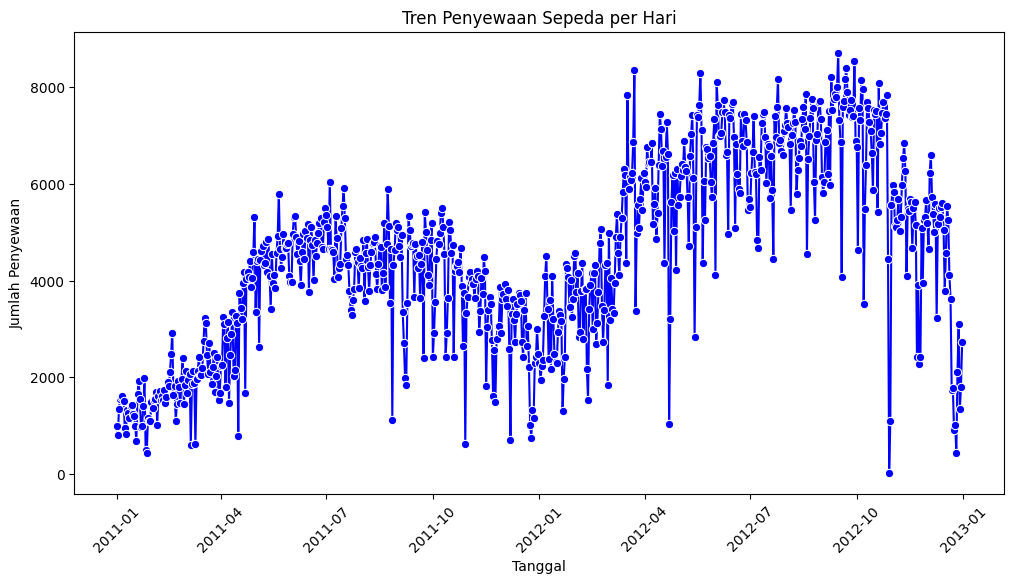

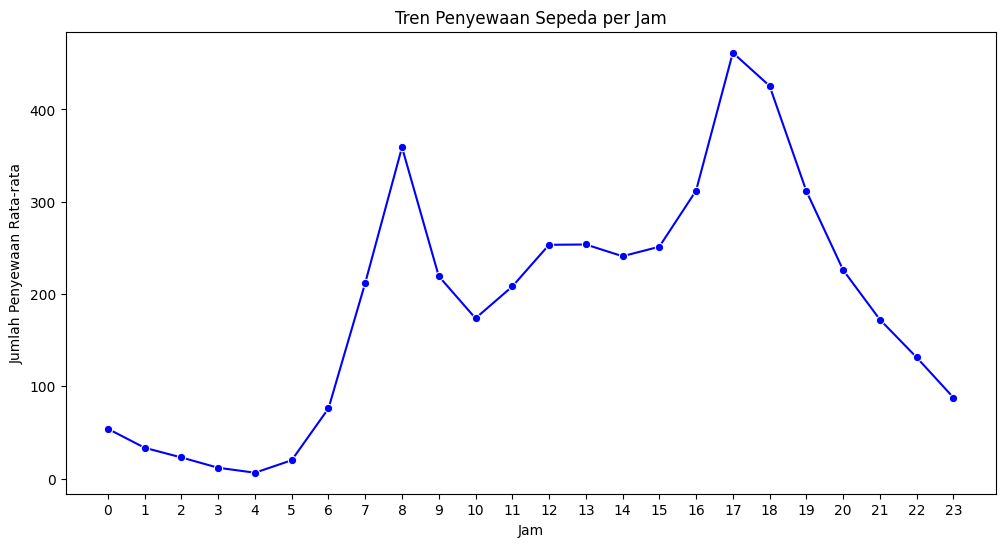

In [ ]:
# 1. Tren Penyewaan Sepeda per Hari
plt.figure(figsize=(12, 6))
sns.lineplot(data=Day, x='dteday', y='cnt', marker="o", color='blue')
plt.title("Tren Penyewaan Sepeda per Hari")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.show()

# 2. Tren Penyewaan Sepeda per Jam
plt.figure(figsize=(12, 6))
sns.lineplot(data=Hour.groupby('hr')['cnt'].mean().reset_index(), x='hr', y='cnt', marker="o", color='blue')
plt.title("Tren Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Rata-rata")
plt.xticks(range(0, 24))
plt.show()

**Insight:**
- (Grafik Pertama) Dari grafik ini, saya melihat bahwa jumlah penyewaan sepeda mengalami tren kenaikan dari awal tahun 2011 hingga akhir 2012.
- (Grafik kedua)Aktivitas penyewaan mulai meningkat setelah pukul 06:00, mencapai puncaknya di pagi hari, stabil pada siang hari, dan kembali meningkat menjelang sore.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

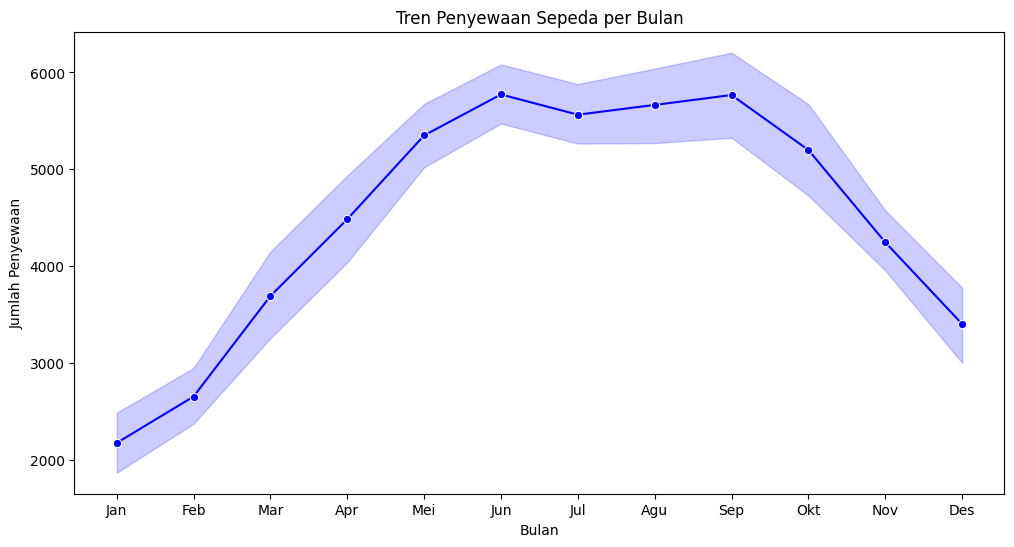

In [ ]:

# Visualisasi tren penyewaan sepeda per bulan
plt.figure(figsize=(12, 6))
sns.lineplot(data=Day, x='mnth', y='cnt', marker="o", color='blue')
plt.title("Tren Penyewaan Sepeda per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()


### Pertanyaan 2:

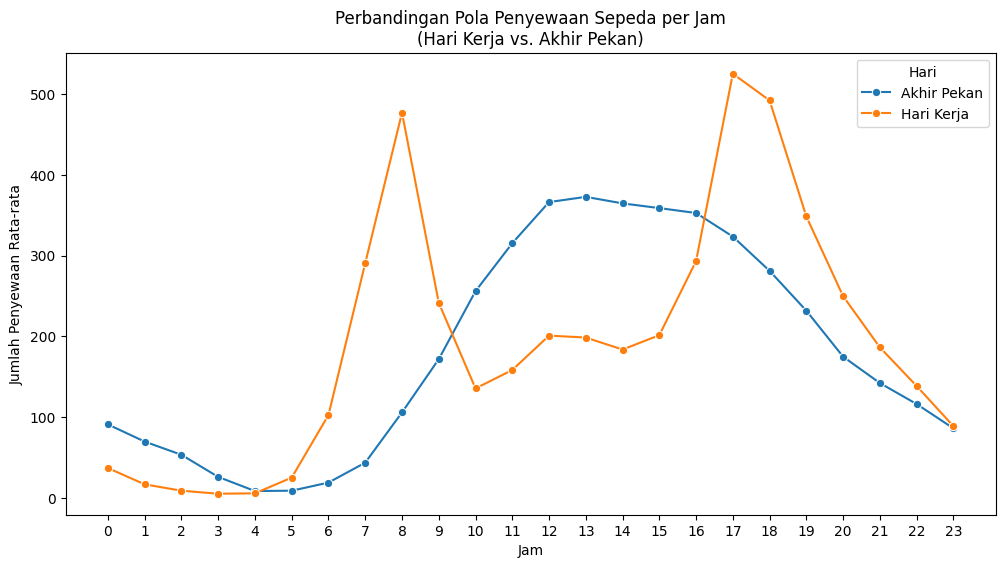

In [ ]:
# Pisahkan data hari kerja dan akhir pekan
Hour['workingday'] = Hour['workingday'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'})

# Visualisasi pola penyewaan per jam untuk hari kerja dan akhir pekan
plt.figure(figsize=(12, 6))
sns.lineplot(data=Hour.groupby(['hr', 'workingday'])['cnt'].mean().reset_index(),
             x='hr', y='cnt', hue='workingday', marker="o")
plt.title("Perbandingan Pola Penyewaan Sepeda per Jam\n(Hari Kerja vs. Akhir Pekan)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Rata-rata")
plt.xticks(range(0, 24))
plt.legend(title="Hari")
plt.show()

**Insight:**
- insight pada grafik pertama, Pada hari kerja, terdapat dua puncak utama pada pagi hari (07:00-09:00) dan sore hari (17:00-19:00), mencerminkan pola perjalanan pekerja atau pelajar.
- Pada hari kerja, puncak penyewaan terjadi pagi (07:00-09:00) dan sore (17:00-19:00), mencerminkan mobilitas pekerja dan pelajar. Sementara itu, akhir pekan menunjukkan pola lebih merata, dipengaruhi oleh aktivitas kecil

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 (Bagaimana pola tren penyewaan sepeda dalam setahun?).

 Penyewaan sepeda menunjukkan tren meningkat pada musim panas dan menurun saat musim dingin, yang kemungkinan dipengaruhi oleh faktor cuaca serta aktivitas pengguna.

---

- Conclution pertanyaan 2 (Bagaimana perbedaan pola penyewaan sepeda antara hari kerja dan akhir pekan?).

 Sepeda banyak digunakan sebagai sarana transportasi utama pada hari kerja, sedangkan pada akhir pekan lebih digunakan untuk kegiatan rekreasi.